<a href="https://colab.research.google.com/github/MimboureYara/data_manager_training/blob/main/Preprocessing_method_for_data_analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this module we are going talk about data mining of exploratory data analysis (EDA) method and data processing also known as data preprocessing (DP) and finally data visualization (DataViz).


---


### **I.** EDA method
**I.1.**  loading data\
**I.2**   data description\
**I.3.**   exploratory data analysis:
*    univariate
*    bivariate
*    multivariate


---


###  **II.** Statistical relations


---


###  **III.** Problem detection
**III.1.**   missing value\
**III.2.**   duplicates value\
**III.3.**   outlier value


---
###  **IV.** Data preprocessing method
These methods consist of setting the problems we found in data mining and do some necessary transformations like transform categorical variables in digital and normalize the data.

---


###  **V.** Visualization method
Here we will see several graphs with the packages of Python:\
**V.1.** Matplotlib,\
**V.2.** Seaborn,\
**V.3.** Plotly Express.



# 0. loading libraries

In [3]:
import pandas as pd # to access data analysis fonction
import numpy as np # to access numerical analysis fonction
import matplotlib.pyplot as plt # to access graphic analysis fonction
import seaborn as sns # to access graphic analysis fonction
from sklearn.preprocessing import LabelEncoder # label encoding method
from sklearn.preprocessing import StandardScaler # features scaling method
from sklearn.preprocessing import MinMaxScaler # features scaling method

## 0.1. connection to defaults databases

In [ ]:
from seaborn.utils import get_dataset_names
get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

# I. data visualization


## I.1. data information

In [ ]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
data.shape

(891, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## I.2. analysis and relationship between variables

### I.2.1. Univariate analysis

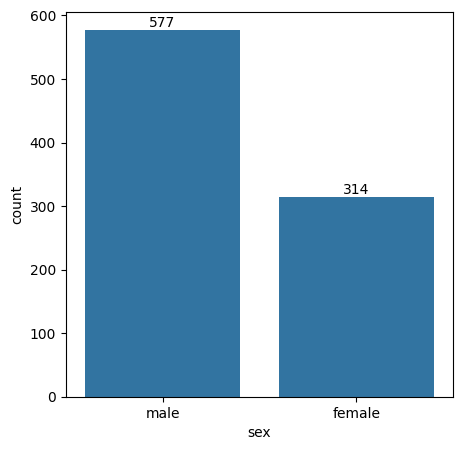

In [ ]:
plt.figure(figsize=(5,5))
graph_sex = sns.countplot(x='sex', data=data)
graph_sex.bar_label(graph_sex.containers[0], fontsize=10);

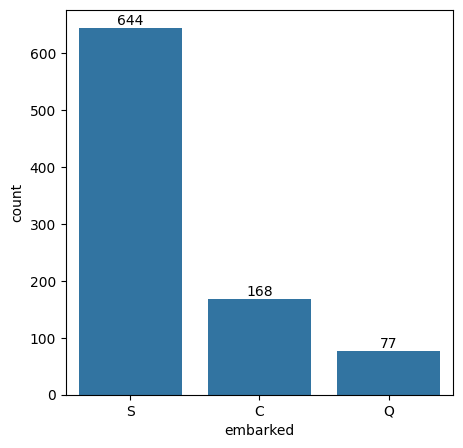

In [ ]:
plt.figure(figsize=(5,5))
graph_embarked = sns.countplot(x='embarked', data=data)
graph_embarked.bar_label(graph_embarked.containers[0], fontsize=10);

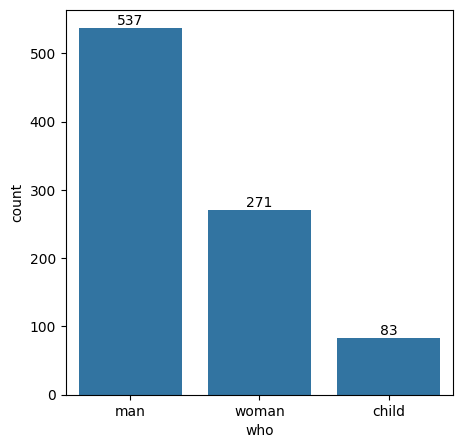

In [ ]:
plt.figure(figsize=(5,5))
graph_embarked = sns.countplot(x='who', data=data)
graph_embarked.bar_label(graph_embarked.containers[0], fontsize=10);

<Axes: xlabel='age'>

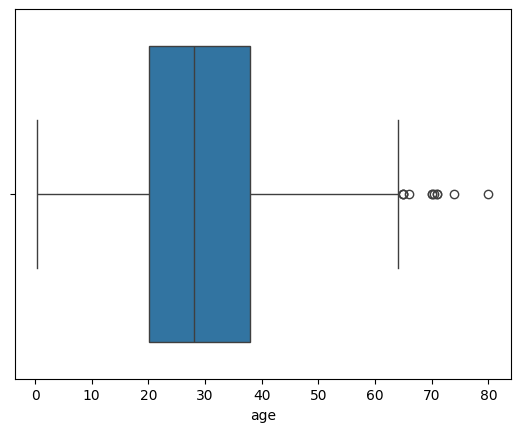

In [ ]:
sns.boxplot(x='age', data=data)

In [ ]:
num_variables = data.select_dtypes('number')#.columns
num_variables

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


**Processing 1 : Check age NaN values**

<Axes: >

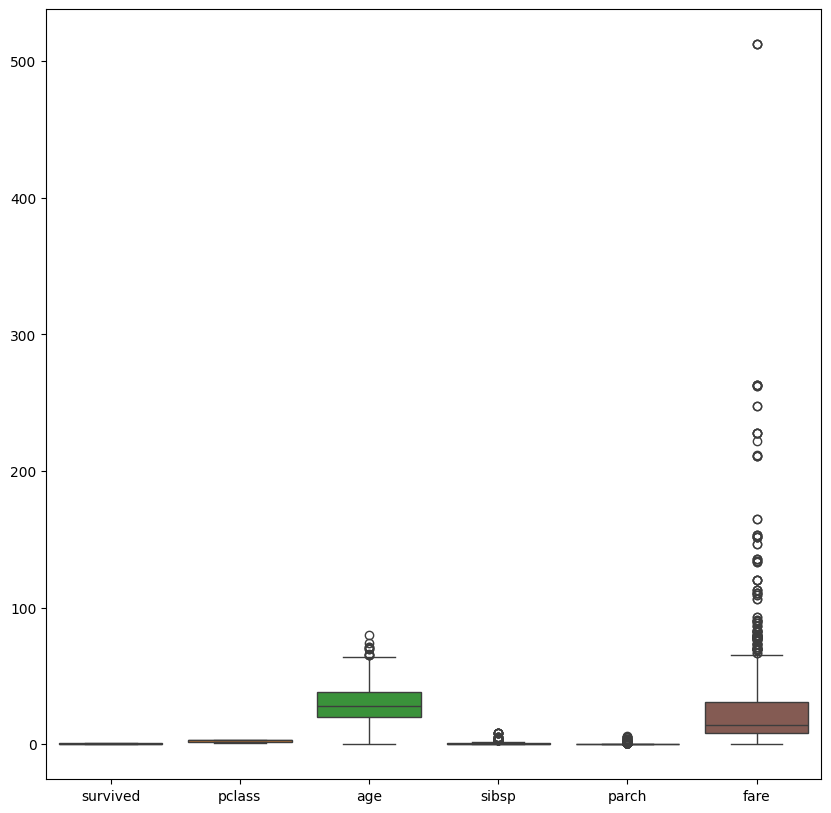

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(num_variables)

<Axes: ylabel='survived'>

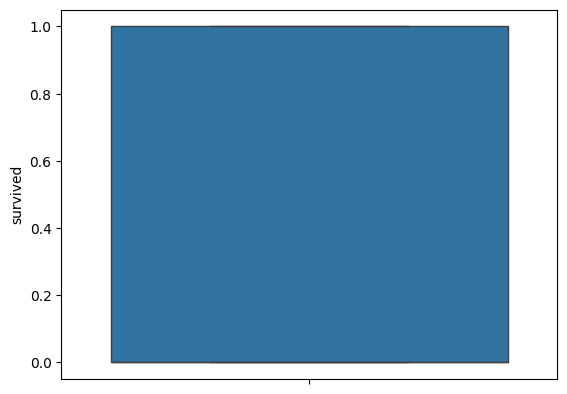

In [ ]:
sns.boxplot(num_variables["survived"])

<Axes: ylabel='pclass'>

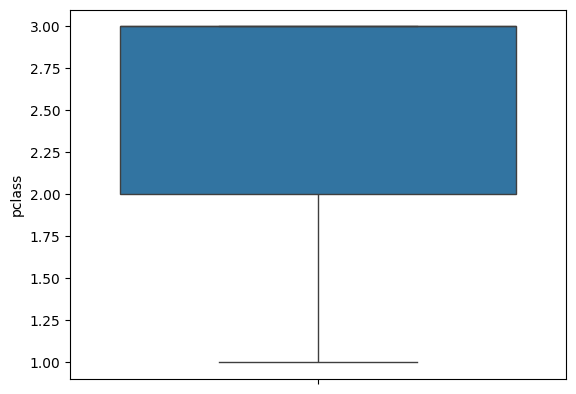

In [ ]:
sns.boxplot(num_variables["pclass"])

In [ ]:
num_variables['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
num_variables['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: >

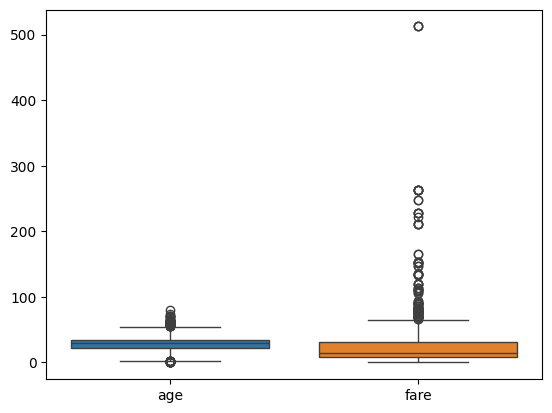

In [ ]:
data1 = data[['age','fare']]
sns.boxplot(data1)

**Precossing 2 : check outhliers values in age and fare**

##I.2. bivariate analysis

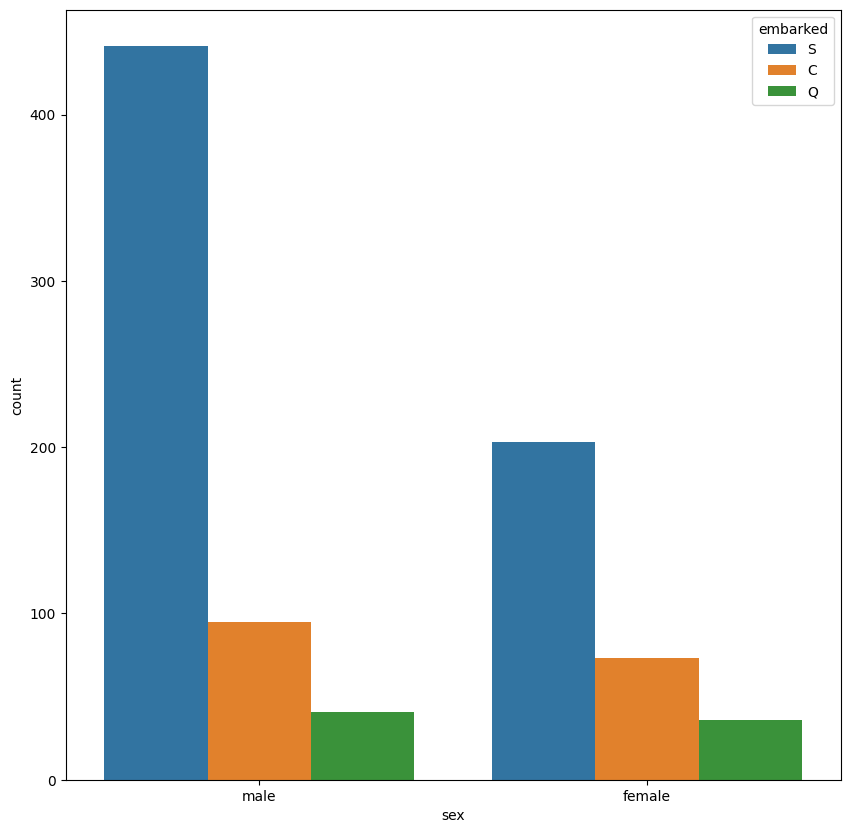

In [ ]:
plt.figure(figsize=(10,10))
graph_sex_embarked = sns.countplot(x='sex', hue='embarked', data=data)

<Axes: xlabel='sex', ylabel='age'>

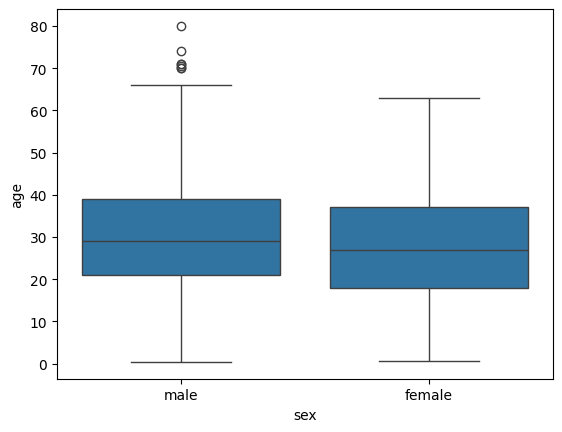

In [ ]:
sns.boxplot(x='sex', y='age', data=data)

<Axes: xlabel='age', ylabel='fare'>

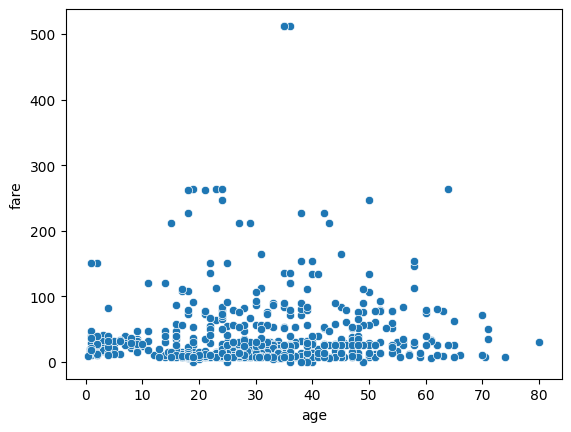

In [ ]:
sns.scatterplot(x='age', y='fare', data=data)

## I.3. multivariate analysis

<Axes: >

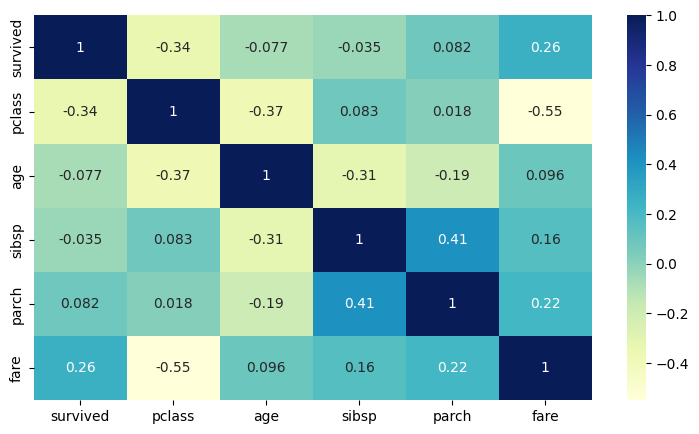

In [ ]:
corr = num_variables.corr(method='pearson')  # or pearson method
plt.figure(figsize=(9,5))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="YlGnBu",
          annot=True)

<Axes: >

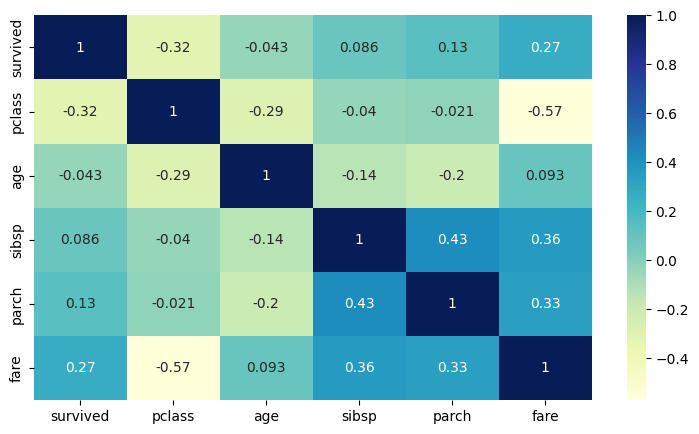

In [ ]:
corr = num_variables.corr(method='kendall') # kendall method
plt.figure(figsize=(9,5))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="YlGnBu",
          annot=True)

<Axes: >

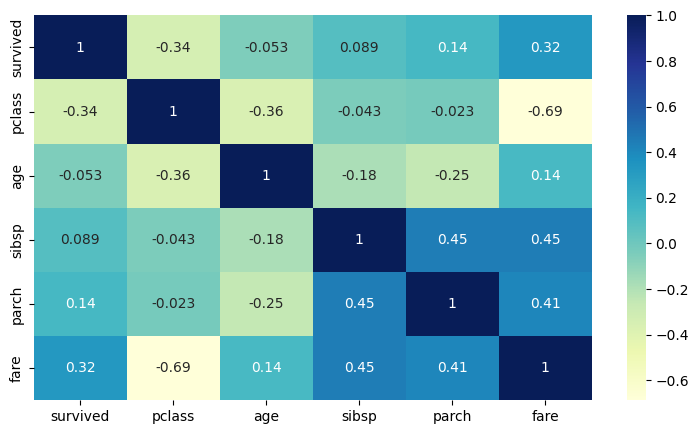

In [ ]:
corr = num_variables.corr(method='spearman') # kendall method
plt.figure(figsize=(9,5))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="YlGnBu",
          annot=True)

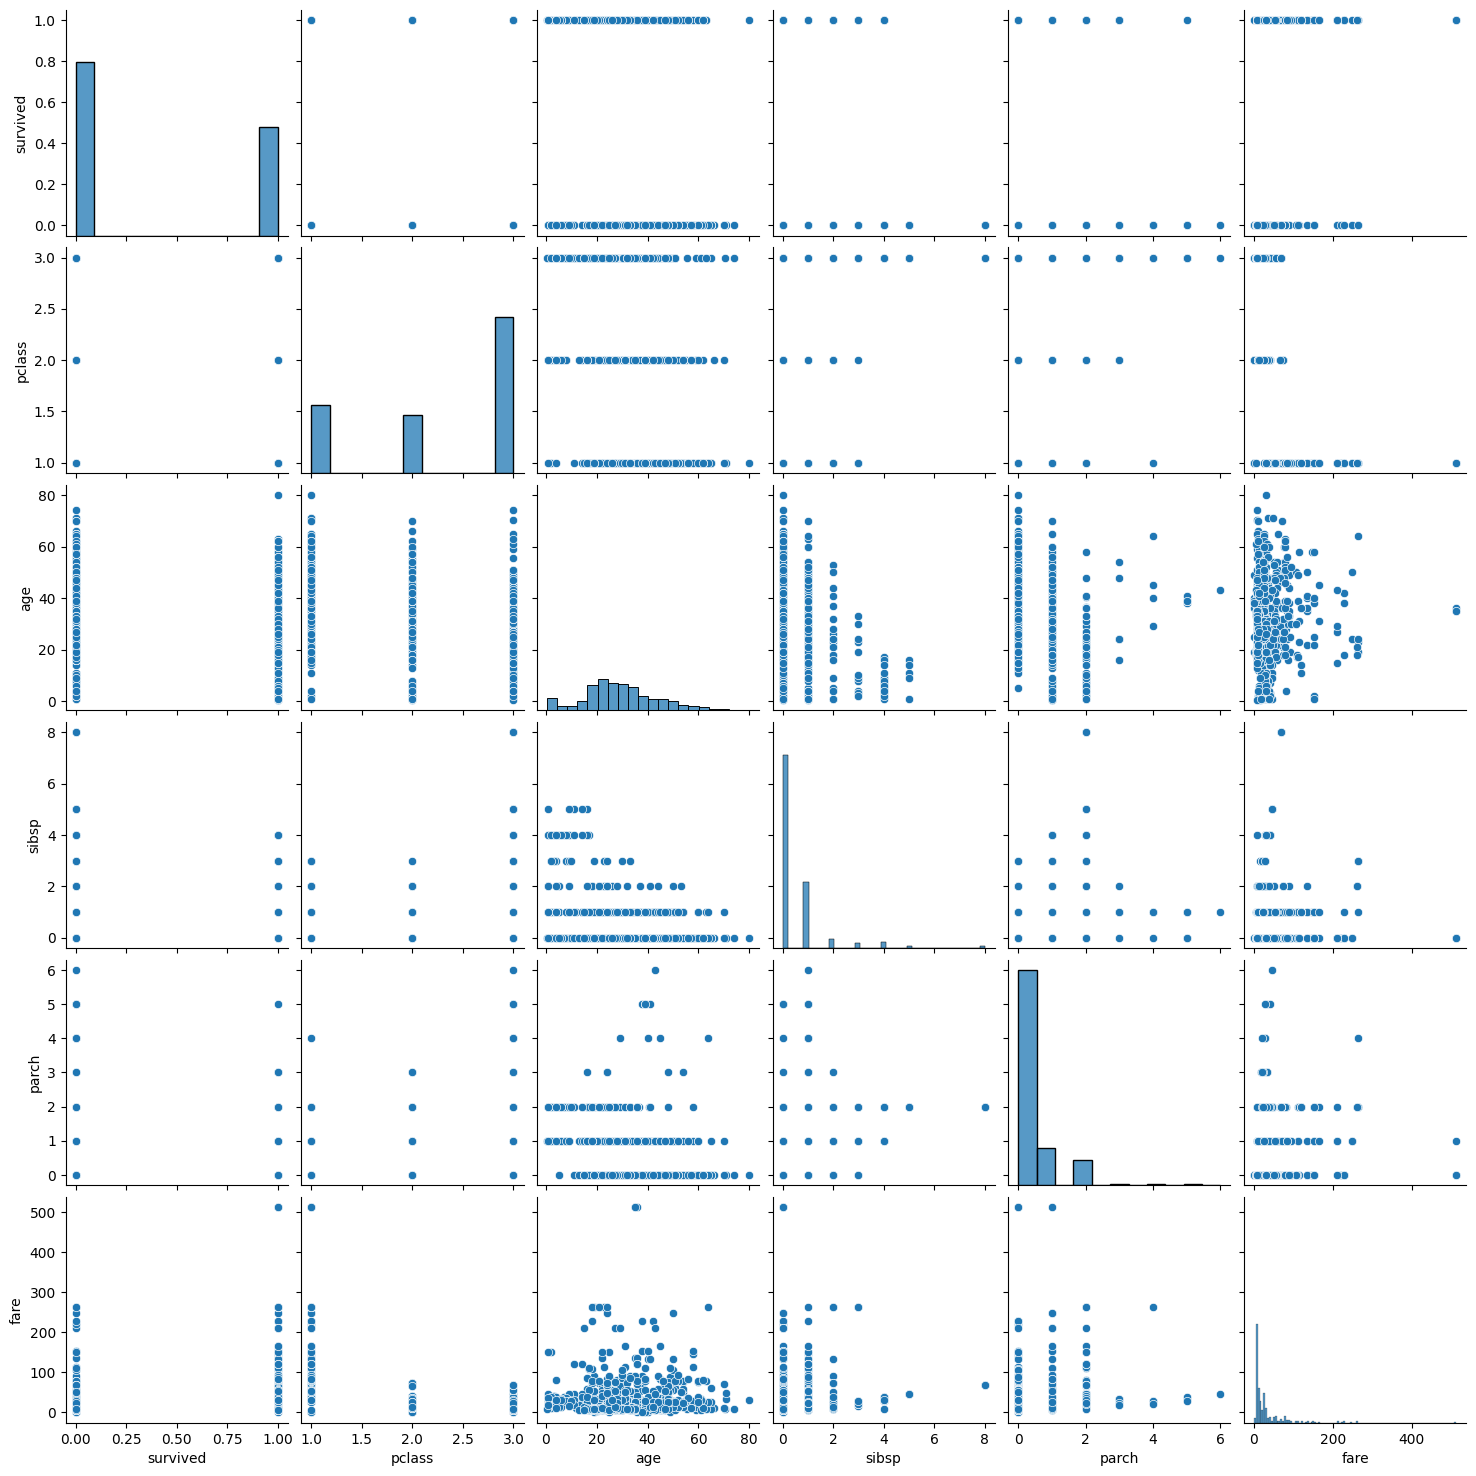

In [ ]:
sns.pairplot(num_variables)

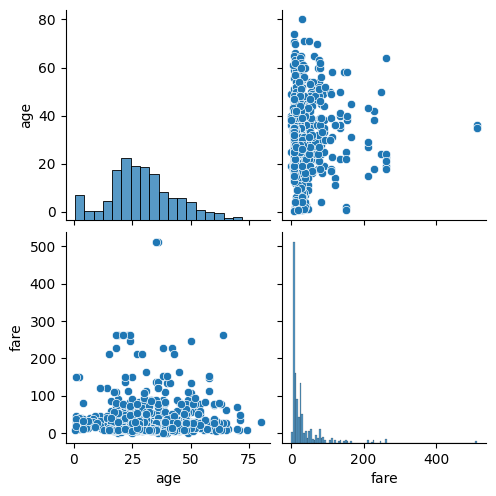

In [ ]:
sns.pairplot(data1)

***Preprocessing 3 : we can replace age missing value by mean and we can use normalisation method to scalling features***

***Preprocessing 4 : we can standardition to scalling fare values***

## I.4. problem detection



I.4.1. view duplicated rows

In [ ]:
data.duplicated().sum()

107

# I.4.2. view number of missing values by variable

In [ ]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

I.4.3. outliers values

In [ ]:
num_variables.skew(axis = 0, skipna = True)

survived    0.478523
pclass     -0.630548
age         0.389108
sibsp       3.695352
parch       2.749117
fare        4.787317
dtype: float64

# II. data processing

## II.1. removing duplicates values

In [ ]:
data=data.drop_duplicates()

## II.1. missing values correction

In [ ]:
mean_value = data['age'].mean()
data['age'] = data['age'].fillna(mean_value) # replace age missing value by mean

In [ ]:
most_frequent_category = data['deck'].mode()[0]
data['deck'] = data['deck'].fillna(most_frequent_category) # replace missing values of a categorical variable with the most frequent category

In [ ]:
most_frequent_category = data['embarked'].mode()[0]
data['embarked'] = data['embarked'].fillna(most_frequent_category) # replace missing values of a categorical variable with the most frequent category

In [ ]:
ost_frequent_category = data['embark_town'].mode()[0]
data['embark_town'] = data['embark_town'].fillna(most_frequent_category) # replace missing values of a categorical variable with the most frequent category

## II.2. outliers values correction

In [ ]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers

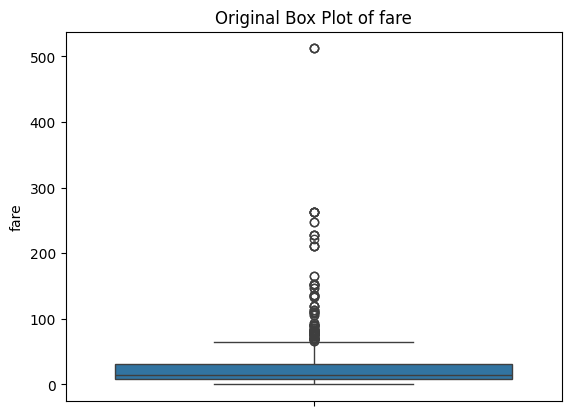

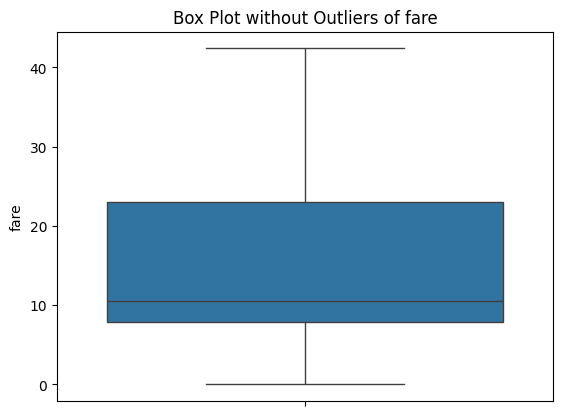

In [ ]:
threshold_value = 45

no_outliers = removal_box_plot(data, 'fare', threshold_value)

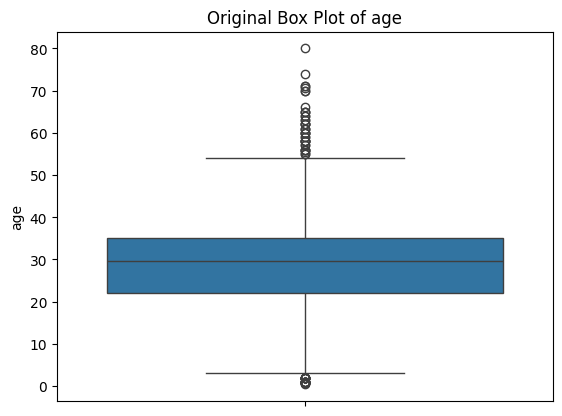

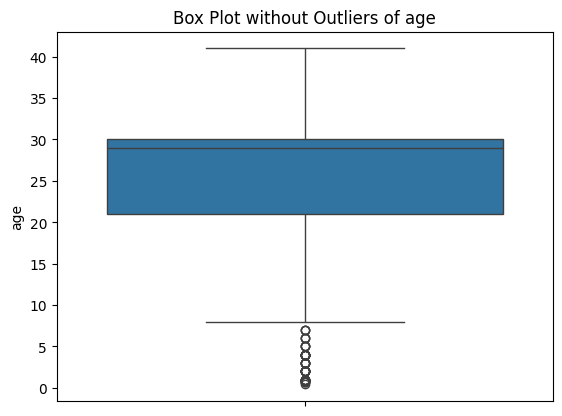

In [ ]:
threshold_value = 41

no_outliers = removal_box_plot(data, 'age', threshold_value)

## II.3. normalisation

In [ ]:
num_variables = data.select_dtypes('number')#.columns

In [ ]:
# Normalize data using StandardScaler
scaler = StandardScaler()
num_variables_normalized = scaler.fit_transform(num_variables)
num_variables_normalized = pd.DataFrame(num_variables_normalized, columns=num_variables.columns)
# Print normalized data
print(num_variables_normalized)

[[-0.78927234  0.82737724 -0.5924806   0.43279337 -0.47367361 -0.50244517]
 [ 1.2669898  -1.56610693  0.63878901  0.43279337 -0.47367361  0.78684529]
 [ 1.2669898   0.82737724 -0.2846632  -0.4745452  -0.47367361 -0.48885426]
 ...
 [-0.78927234  0.82737724  0.          0.43279337  2.00893337 -0.17626324]
 [ 1.2669898  -1.56610693 -0.2846632  -0.4745452  -0.47367361 -0.04438104]
 [-0.78927234  0.82737724  0.17706291 -0.4745452  -0.47367361 -0.49237783]]


In [ ]:
data_not_numeric = data.drop(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], axis=1)

categories and objects variables encoding

In [ ]:
objList_data = data_not_numeric.select_dtypes(include = "object").columns
print(objList_data)

Index([], dtype='object')


In [ ]:
objList = data.select_dtypes(include = "object").columns
print (objList)

Index(['sex', 'embarked', 'who', 'embark_town', 'alive'], dtype='object')


In [ ]:
le = LabelEncoder()

for feat in objList:
    data[feat] = le.fit_transform(data[feat].astype(str))

print (data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 783 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     783 non-null    int64   
 1   pclass       783 non-null    int64   
 2   sex          783 non-null    int64   
 3   age          783 non-null    float64 
 4   sibsp        783 non-null    int64   
 5   parch        783 non-null    int64   
 6   fare         783 non-null    float64 
 7   embarked     783 non-null    int64   
 8   class        783 non-null    category
 9   who          783 non-null    int64   
 10  adult_male   783 non-null    bool    
 11  deck         783 non-null    category
 12  embark_town  783 non-null    int64   
 13  alive        783 non-null    int64   
 14  alone        783 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(9)
memory usage: 76.9 KB
None


In [ ]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,Third,1,True,C,3,0,False
1,1,1,0,38.000000,1,0,71.2833,0,First,2,False,C,0,1,False
2,1,3,0,26.000000,0,0,7.9250,2,Third,2,False,C,3,1,True
3,1,1,0,35.000000,1,0,53.1000,2,First,2,False,C,3,1,False
4,0,3,1,35.000000,0,0,8.0500,2,Third,1,True,C,3,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.000000,0,5,29.1250,1,Third,2,False,C,1,0,False
887,1,1,0,19.000000,0,0,30.0000,2,First,2,False,B,3,1,True
888,0,3,0,29.699118,1,2,23.4500,2,Third,2,False,C,3,0,False
889,1,1,1,26.000000,0,0,30.0000,0,First,1,True,C,0,1,True


In [ ]:
df_row = pd.concat([num_variables_normalized, data2], axis=1)

In [ ]:
df_row

,survived,pclass,age,sibsp,parch,fare,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,-0.789272,0.827377,-0.530377,0.432793,-0.473674,-0.502445,male,S,Third,man,True,C,Southampton,no,False
1,1.266990,-1.566107,0.571831,0.432793,-0.473674,0.786845,female,C,First,woman,False,C,Cherbourg,yes,False
2,1.266990,0.827377,-0.254825,-0.474545,-0.473674,-0.488854,female,S,Third,woman,False,C,Southampton,yes,True
3,1.266990,-1.566107,0.365167,0.432793,-0.473674,0.420730,female,S,First,woman,False,C,Southampton,yes,False
4,-0.789272,0.827377,0.365167,-0.474545,-0.473674,-0.486337,male,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.789272,-0.369365,-0.185937,-0.474545,-0.473674,-0.386671,male,S,Second,man,True,C,Southampton,no,True
887,1.266990,-1.566107,-0.737041,-0.474545,-0.473674,-0.044381,female,S,First,woman,False,B,Southampton,yes,True
888,-0.789272,0.827377,NaN,0.432793,2.008933,-0.176263,female,S,Third,woman,False,C,Southampton,no,False
889,1.266990,-1.566107,-0.254825,-0.474545,-0.473674,-0.044381,male,C,First,man,True,C,Cherbourg,yes,True
